* 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Online+Retail#
## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## 폰트 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [5]:
import os

os.getcwd()

'/Users/corazzon/codes/snu-python'

In [6]:
os.listdir("data")

['.DS_Store',
 'nhis_drug_sample_10.csv',
 'online_retail.csv',
 'nhis_drug_sample_2020_3.csv',
 'HP_T60_2020_1.CSV',
 'HP_T60_2020_2.CSV',
 'HP_T60_2020_3.CSV',
 'kosis-cancer-raw.csv',
 'kosis-cancer.csv']

In [13]:
# pd.read_excel 로 데이터를 불러옵니다.
# 데이터의 용량이 커서 로드하는데 1분 이상 걸릴 수도 있습니다. 또 read_excel은 시간이 오래 걸립니다.
# csv로 로드하는 것이 훨씬빠릅니다.
# df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
df = pd.read_csv("data/online_retail.csv")
df.shape

(541909, 8)

## 데이터 미리보기 및 요약

In [14]:
# head
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# tail
df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## info

In [16]:
# 데이터 집합과 각 열들의 자료형을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Attribute Information:

- InvoiceNo: 송장번호. 해당 거래에 할당된 6자리 정수
  * 이 코드가 문자 'c'로 시작하면 취소를 나타냅니다.
- StockCode: 제품 코드. 각 고유 제품에 고유하게 할당된 5자리 정수
- Description: 제품 이름
- Quantity: 거래당 각 제품의 수량 
  * 이 코드가 ‘-’(마이너스)로 시작하면 취소를 나타냅니다.
- InvoiceDate:  송장 날짜 및 시간. 숫자, 각 거래가 생성된 날짜 및 시간
- UnitPrice: 단가. 제품 가격(영국 화폐)
- CustomerID: 고객 번호. 해당 고객에게 고유하게 할당된 5자리 정수
- Country: 국가 이름. 해당 고객이 거주하는 국가의 이름

## 기술통계

In [17]:
# describe 를 통해 수치 타입의 기술통계를 구합니다.
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
# describe 를 통해 object 타입의 기술통계를 구합니다.
df.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


## 결측치

In [21]:
# 결측치 합계를 구합니다.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [24]:
# 결측치 비율을 구합니다.
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

<AxesSubplot:>

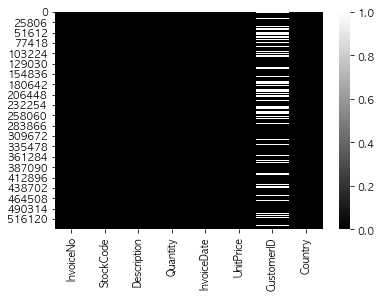

In [26]:
# 결측치를 시각화 합니다.
sns.heatmap(df.isnull(), cmap="gray")

## 히스토그램으로 전체 수치변수 시각화

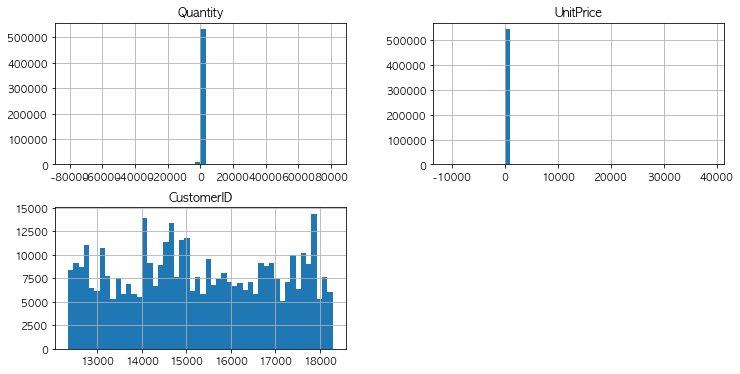

In [30]:
# 히스토그램은 측정값을 구간으로 나누어 도수분포로 나타낸 plot입니다.
_ = df.hist(figsize=(12, 6), bins=50)

## 전체 주문금액 파생변수 만들기
* 수량 X 금액으로 전체 금액 계산하기

In [34]:
# TotalPrice 는 RFM 중 MonetaryValue의 값이 됩니다.
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


## 회원 vs 비회원 구매

In [36]:
# CustomerID 결측치 유무
df["CustomerID"].isnull().value_counts()

False    406829
True     135080
Name: CustomerID, dtype: int64

In [37]:
df["CustomerID"].isnull().value_counts(normalize=True)

False    0.750733
True     0.249267
Name: CustomerID, dtype: float64

## 매출액 상위 국가

In [38]:
# 국가별 매출액의 평균과 합계를 구합니다.
# TotalPrice를 통해 매출액 상위 10개만 가져옵니다.
top_sale_country =  df.groupby("Country")["TotalPrice"].agg(
    ["mean", "sum"]).sort_values("sum", ascending=False)
top_sale_country.head(10).style.format("{:,}")

,mean,sum
Country,,
United Kingdom,16.525065419655363,"8,187,806.364"
Netherlands,120.05969633066216,"284,661.54"
EIRE,32.12259882869693,"263,276.82"
Germany,23.348942601369142,"221,698.21"
France,23.06928830197499,"197,403.9"
Australia,108.87789515488483,"137,077.27"
Switzerland,28.164510489510487,"56,385.35"
Spain,21.624390051322543,"54,774.58"
Belgium,19.773301111648138,"40,910.96"


## 날짜와 시간

In [39]:
# InvoiceDate를 datetime 모듈을 통해 날짜형식으로 변환해 줍니다.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].head(1)

0   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [40]:
# year, month, day, dayofweek 를 InvoiceDate에서 추출하여 파생변수로 생성합니다.
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,2


In [41]:
# InvoiceDate 에서 time, hour 에 대한 파생변수도 생성합니다.
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,2,08:26:00,8


In [42]:
# day_name() 을 통해 InvoiceDate 에서 요일명을 추출하여 파생변수로 생성합니다.
df["InvoiceDayname"] = df["InvoiceDate"].dt.day_name()
df["InvoiceDayname"].sample(5)

170819     Thursday
159106       Sunday
128908      Tuesday
534698    Wednesday
267797       Monday
Name: InvoiceDayname, dtype: object

In [43]:
# InvoiceDate 에서 앞에서 7개문자만 가져오면([:7]) 연, 월만 따로 생성합니다.
df["InvoiceYM"] = df["InvoiceDate"].astype(str).str[:7]
df[["InvoiceDate", "InvoiceYM"]].sample(5)

,InvoiceDate,InvoiceYM
435834,2011-11-02 15:38:00,2011-11
470117,2011-11-15 16:57:00,2011-11
142381,2011-04-01 11:28:00,2011-04
438421,2011-11-03 18:49:00,2011-11
35430,2010-12-17 14:49:00,2010-12


<AxesSubplot:xlabel='InvoiceYear', ylabel='count'>

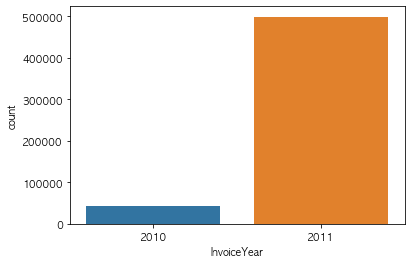

In [44]:
# countplot 으로 연도(InvoiceYear)별 구매 빈도수 시각화합니다.
sns.countplot(data=df, x="InvoiceYear")

<AxesSubplot:xlabel='InvoiceMonth', ylabel='count'>

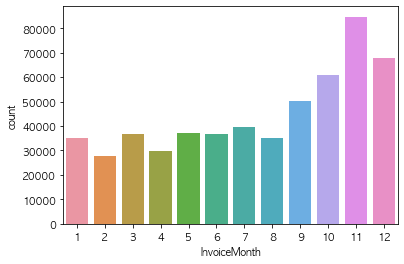

In [45]:
# countplot 으로 월(InvoiceMonth)별 구매 빈도수 시각화합니다.

sns.countplot(data=df, x="InvoiceMonth")

<AxesSubplot:xlabel='InvoiceYM', ylabel='count'>

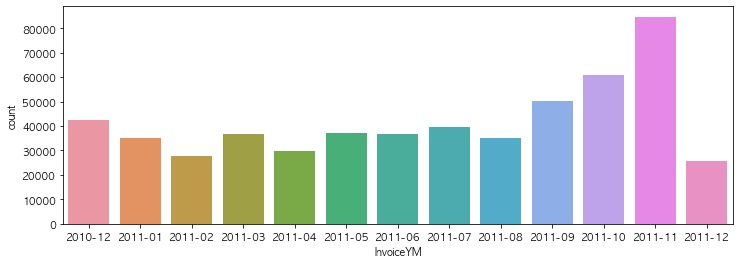

In [46]:
# countplot 으로 연도-월별(InvoiceYM) 구매 빈도수 시각화합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceYM")

In [47]:
df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceTime,InvoiceHour,InvoiceDayname,InvoiceYM
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,4,12:50:00,12,Friday,2011-12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,12,9,4,12:50:00,12,Friday,2011-12


### 요일별 빈도수

<AxesSubplot:xlabel='InvoiceDow', ylabel='count'>

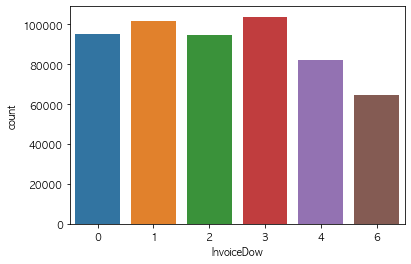

In [48]:
# countplot 으로 요일별( InvoiceDow ) 구매 빈도수 시각화합니다.
sns.countplot(data=df, x="InvoiceDow")

In [49]:
# 시간별( InvoiceHour ), 요일별( InvoiceDow )로 crosstab 을 통해 구매 빈도수 구합니다.
order_hour_dow = pd.crosstab(df["InvoiceHour"], df["InvoiceDow"])
order_hour_dow

InvoiceDow,0,1,2,3,4,6
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


In [53]:
[w for w in "월화수목금일"]

['월', '화', '수', '목', '금', '일']

In [50]:
# 리스트컴프리헨션(List comprehension)을 통해 토요일을 제외한 
# "월화수목금일"요일 문자열을 리스트를 컬럼명으로 대체합니다.
# 위에서 구한 값을 .style.background_gradient() 통해서 시각화합니다.
# order_hour_dow

order_hour_dow.columns = [w for w in "월화수목금일"]
order_hour_dow.style.background_gradient()

,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,41,0,0
7,61,65,59,64,134,0
8,1641,1751,1826,1834,1857,0
9,7497,6440,5186,8060,7119,30
10,8872,9125,7904,9321,10215,3600
11,8926,10052,9973,8369,9589,10765
12,11801,14327,14527,13485,10942,13627
13,12756,12619,11901,12428,10488,12067
14,11502,11656,11006,11518,11737,10052


<AxesSubplot:xlabel='InvoiceHour'>

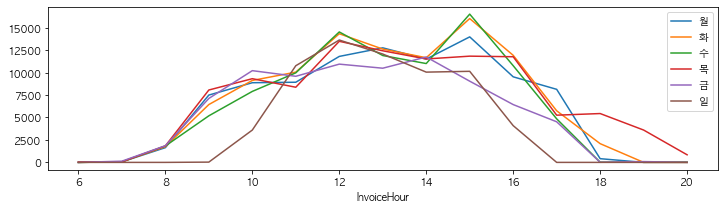

In [54]:
# 시간별_요열별 구매 주문( order_hour_dow )을 시각화합니다.
order_hour_dow.plot(figsize=(12, 3))

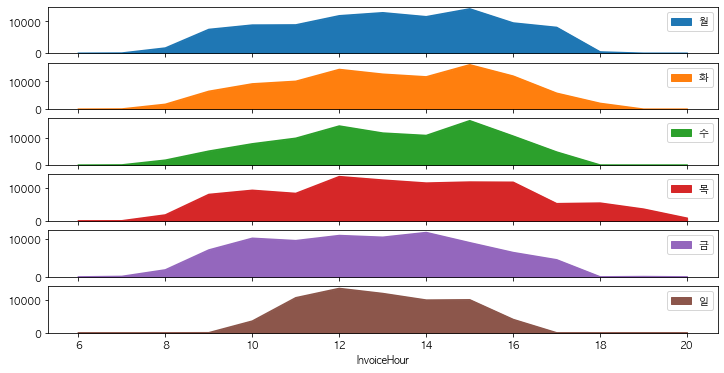

In [55]:
# 시간별_요열별 구매 주문( order_hour_dow )을 subplot을 통해 요일별 시각화합니다.

_ = order_hour_dow.plot.area(figsize=(12, 6), subplots=True)

<AxesSubplot:ylabel='InvoiceHour'>

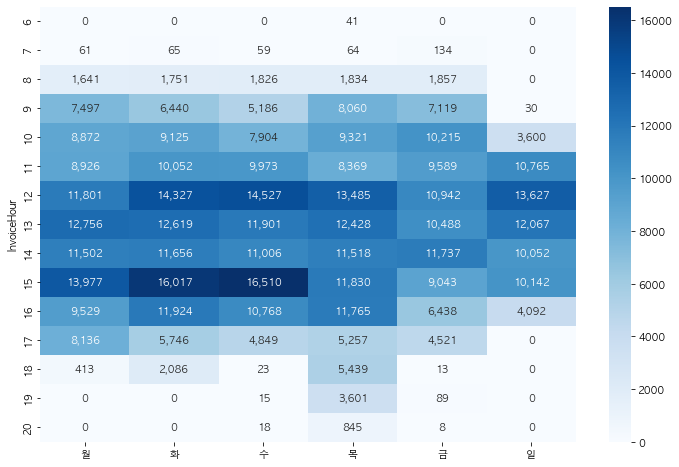

In [56]:
# 시간별_요열별 구매 주문( order_hour_dow )을 heatmap을 통해 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(order_hour_dow, annot=True, fmt=',.0f',cmap="Blues")

### 시간대 빈도수

<AxesSubplot:xlabel='InvoiceHour', ylabel='count'>

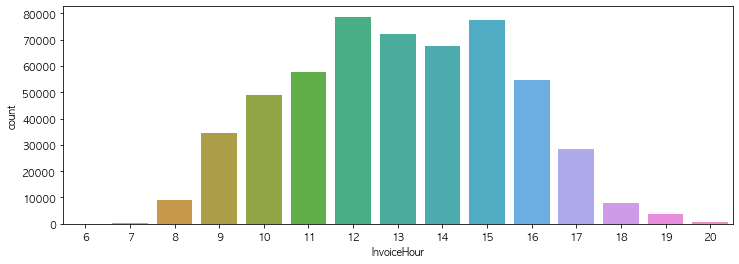

In [57]:
# countplot으로 시간대( InvoiceHour ) 구매 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="InvoiceHour")

## 유효한 데이터만 추출
```python

df_valid = df[df["CustomerID"].notnull() & (df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df_valid = df_valid.drop_duplicates()
df_valid.shape
```

In [65]:
# "CustomerID" 가 있고(notnull) "Quantity", "UnitPrice" 가 0보다 큰 데이터를 가져옵니다.
# 구매하고 취소한 건 중 취소한 건만 제외하고 구매 건은 남깁니다.
# 유효한 데이터를 df_valid 변수에 할당합니다.
print(df.shape)
df_valid = df[(df["CustomerID"].notnull()) &
              (df["Quantity"] > 0) &
              (df["UnitPrice"] > 0)]
df_valid.shape

(541909, 17)


(397884, 17)

In [66]:
# 고객ID가 없는 건도 제거하여 df_valid 변수에 할당합니다.
# 중복 데이터 제거
df_valid = df_valid.drop_duplicates()
df_valid.shape

(392692, 17)

## 고객

In [67]:
# df_valid(유효고객, 유효주문) 내 고객별( CustomerID ) 구매( InvoiceNo ) 빈도수를 구합니다.
cust_count = df_valid.groupby("CustomerID")["InvoiceNo"].count()
cust_count

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4338, dtype: int64

In [68]:
# 고객별( CustomerID ) 구매( InvoiceNo ) 빈도수의 기술통계 값을 확인합니다.
cust_count.describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: InvoiceNo, dtype: float64

In [69]:
# cust_count.to_frame(name="count") 으로 데이터 타입을 Series에서 Dataframe으로 변환합니다.
df_cust_count = cust_count.to_frame(name="count")
df_cust_count

,count
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

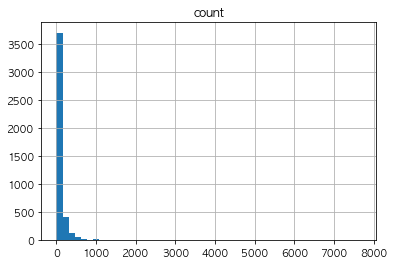

In [70]:
df_cust_count.hist(bins=50)

<AxesSubplot:>

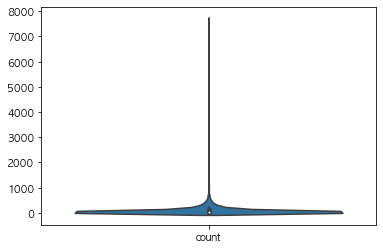

In [71]:
# df_cust_count 를 violinplot 으로 시각화합니다.
sns.violinplot(data=df_cust_count)

## 월단위 데이터 전처리

In [72]:
# get_month_day1() 함수를 통해 " 연도-월-1 " 형식으로 만듭니다.
# 일자를 " 1 "로 통일화한 이유는 월별 잔존률을 구하기 위해서 입니다.(월 단위)
def get_month_day1(x): 
    return dt.datetime(x.year, x.month, 1)

```python
df_valid["InvoiceDate1"] = df_valid["InvoiceDate"].map(get_month_day1)
```

In [74]:
# map() 함수를 통해 get_month_day1() 함수를 df_valid(유효고객, 유효주문)에 일괄 적용합니다.
# " 연도-월-1 "로 표기가 통일된 InvoiceDate1 이라는 파생변수를 생성합니다.
df_valid["InvoiceDate1"] = df_valid["InvoiceDate"].map(get_month_day1)
df_valid[["InvoiceDate", "InvoiceDate1"]].sample(5)

,InvoiceDate,InvoiceDate1
397363,2011-10-14 11:08:00,2011-10-01
182963,2011-05-10 12:55:00,2011-05-01
270721,2011-07-19 15:23:00,2011-07-01
144734,2011-04-04 12:42:00,2011-04-01
95217,2011-02-20 12:23:00,2011-02-01


In [75]:
# InvoiceDdf_valid["InvoiceDate1"]을 구합니다.
df_valid.groupby("CustomerID")["InvoiceDate1"].transform("min")

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: InvoiceDate1, Length: 392692, dtype: datetime64[ns]

```python
df_valid["InvoiceDateMin"] = df_valid.groupby("CustomerID")["InvoiceDate1"].transform("min")
```

In [76]:
# 최초 구매일( InvoiceDateMin )에 InvoiceDate1의 최솟값을 구하여 할당합니다.
# 일자가 " 1 "로 통일되어 있어 " 최근 구매일 - 최초 구매일 "로 첫 구매 후 몇달 후 구매인지를 알 수 있습니다.
df_valid["InvoiceDateMin"] = df_valid.groupby("CustomerID")["InvoiceDate1"].transform("min")

df_valid[["InvoiceDate", "InvoiceDate1", "InvoiceDateMin"]].sample(5)

,InvoiceDate,InvoiceDate1,InvoiceDateMin
101128,2011-02-24 12:41:00,2011-02-01,2011-02-01
100749,2011-02-24 10:15:00,2011-02-01,2011-02-01
475682,2011-11-17 09:51:00,2011-11-01,2011-02-01
407128,2011-10-19 12:35:00,2011-10-01,2010-12-01
323114,2011-09-02 10:21:00,2011-09-01,2011-01-01


```python
year_diff = df_valid["InvoiceDate1"].dt.year - df_valid["InvoiceDateMin"].dt.year
month_diff = df_valid["InvoiceDate1"].dt.month - df_valid["InvoiceDateMin"].dt.month
```

In [77]:
# 연도별 차이(year_diff)와 월별 차이(month_diff)를 구합니다.
 
year_diff = df_valid["InvoiceDate1"].dt.year - df_valid["InvoiceDateMin"].dt.year
month_diff = df_valid["InvoiceDate1"].dt.month - df_valid["InvoiceDateMin"].dt.month

```python
df_valid["CohortIndex"] = year_diff * 12 + month_diff + 1
```

In [81]:
# " 연도차이 * 12개월 + 월차이 + 1 "로 첫 구매 후 몇달 후 구매인지 알 수 있도록 CohortIndex 변수를 생성합니다.
# 2010-12-01부터 2011-12-01의 데이터를 기반으로 진행되어 CohortIndex 변수의 최솟값은 1이며, 최댓값 13입니다.
df_valid["CohortIndex"] = year_diff * 12 + month_diff + 1
df_valid[["InvoiceDateMin", "InvoiceDate1", "CohortIndex"]].sample(5)

,InvoiceDateMin,InvoiceDate1,CohortIndex
460466,2010-12-01,2011-11-01,12
404609,2011-10-01,2011-10-01,1
375621,2011-09-01,2011-10-01,2
40232,2010-12-01,2010-12-01,1
487904,2011-11-01,2011-11-01,1


### 코호트 월별 빈도수

In [82]:
# CohortIndex 값으로 월별 잔존 구매에 대한 빈도수를 구합니다.
# 회원가입 후 월별 구매 빈도수를 value_counts 로 구합니다.
df_valid["CohortIndex"].value_counts().sort_index()

1     116857
2      27516
3      26727
4      26993
5      25165
6      26673
7      23462
8      23298
9      22751
10     22968
11     20098
12     23011
13      7173
Name: CohortIndex, dtype: int64

<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

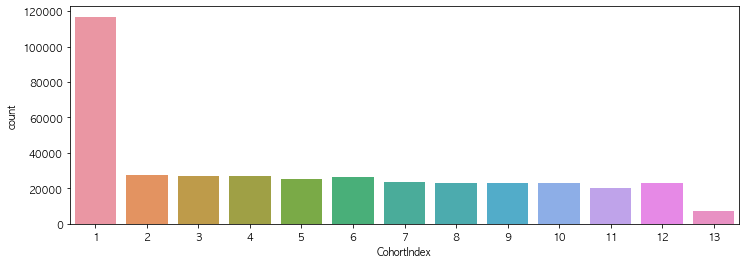

In [83]:
# countplot 으로 CohortIndex 의 빈도수를 시각화합니다.
plt.figure(figsize=(12, 4))
sns.countplot(data=df_valid, x="CohortIndex")

## 월별, 주문건, 주문제품 종류 수, 중복을 제외한 고객 수, 총 주문금액

In [84]:
# df_valid(유효고객, 유효주문)에 대해 월별 데이터( InvoiceMonth )를 확인합니다.
# InvoiceNo 의 수
# StockCode, CustomerID 의 유일값의 수
# UnitPrice, Quantity, TotalPrice 의 sum
df_valid.groupby('InvoiceMonth').agg({"InvoiceNo":"count", 
                                      "StockCode":"nunique", 
                                      "CustomerID":"nunique",
                                      "UnitPrice":"sum",
                                      "Quantity":"sum",
                                      "TotalPrice":"sum"
                                     }).style.format("{:,}")

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceMonth,,,,,,
1,"20,988","2,121",741,"66,234.65","348,473","568,101.31"
2,"19,706","2,124",758,"62,619.48","265,027","446,084.92"
3,"26,870","2,234",974,"87,864.79","347,582","594,081.76"
4,"22,433","2,217",856,"78,543.481","291,366","468,374.331"
5,"28,073","2,219","1,056","101,500.91","372,864","677,355.15"
6,"26,926","2,339",991,"84,602.66","363,014","660,046.05"
7,"26,580","2,351",949,"75,454.521","367,360","598,962.901"
8,"26,790","2,356",935,"78,877.09","397,373","644,051.04"
9,"39,669","2,545","1,266","118,160.322","543,652","950,690.202"


## 잔존 빈도 구하기
```python
cohort_count = df_valid.groupby(["InvoiceDateMin", "CohortIndex"])["CustomerID"].nunique().unstack()
cohort_count
```

In [87]:
# InvoiceDateMin , CohortIndex 로 그룹화 하여 CustomerID 의 유일값에 대한 빈도수를 구합니다.
cohort_count = df_valid.groupby(["InvoiceDateMin", "CohortIndex"])["CustomerID"].nunique().unstack()
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
cohort_count.index = cohort_count.index.astype(str)

<AxesSubplot:xlabel='CohortIndex', ylabel='InvoiceDateMin'>

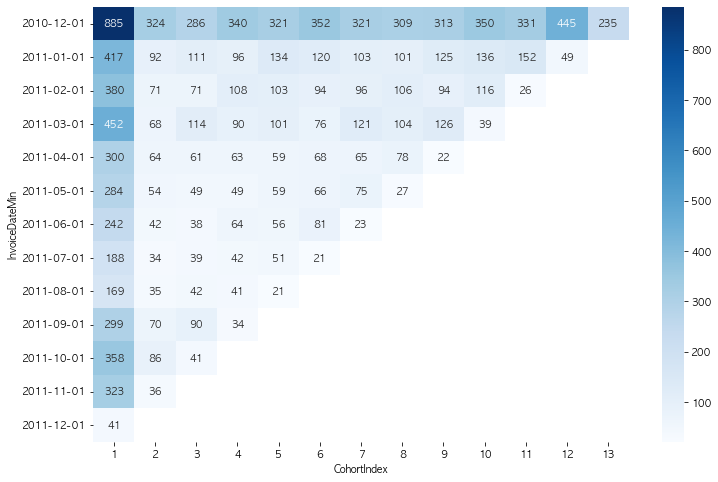

In [97]:
# heatmap을 통해 위에서 구한 잔존수을 시각화 합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, annot=True, fmt=",.0f", cmap="Blues")

### 월별 신규 유입 고객 수 
* Acqusition

In [93]:
cohort_count[1]

InvoiceDateMin
2010-12-01    885.0
2011-01-01    417.0
2011-02-01    380.0
2011-03-01    452.0
2011-04-01    300.0
2011-05-01    284.0
2011-06-01    242.0
2011-07-01    188.0
2011-08-01    169.0
2011-09-01    299.0
2011-10-01    358.0
2011-11-01    323.0
2011-12-01     41.0
Name: 1, dtype: float64

<AxesSubplot:title={'center':'Monthly Acqusition'}, ylabel='InvoiceDateMin'>

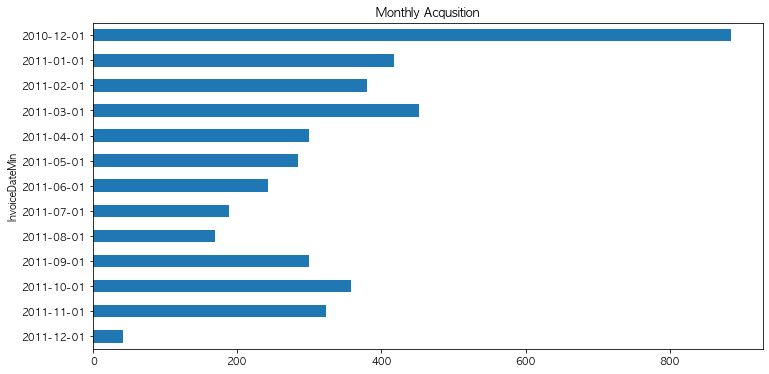

In [94]:
# Monthly Acqusition 을 구합니다.
cohort_count[1].sort_index(
    ascending=False).plot.barh(figsize=(12, 6), title="Monthly Acqusition")

## 잔존율 구하기
```python

cohort_ratio = cohort_count.div(cohort_count[1], axis=0) * 100
cohort_ratio = cohort_ratio.round(2)
cohort_ratio
```

In [ ]:
# NAN == Not a Number 의 약자
np.nan

In [102]:
# 가입한 달을 1로 나누면 잔존률을 구할 수 있습니다.
# div 를 통해 구하며 axis=0 으로 설정하면 첫 달을 기준으로 나머지 달을 나누게 됩니다.
cohort_ratio = cohort_count.div(cohort_count[1], axis=0)
cohort_ratio

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02-01,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03-01,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04-01,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='InvoiceDateMin'>

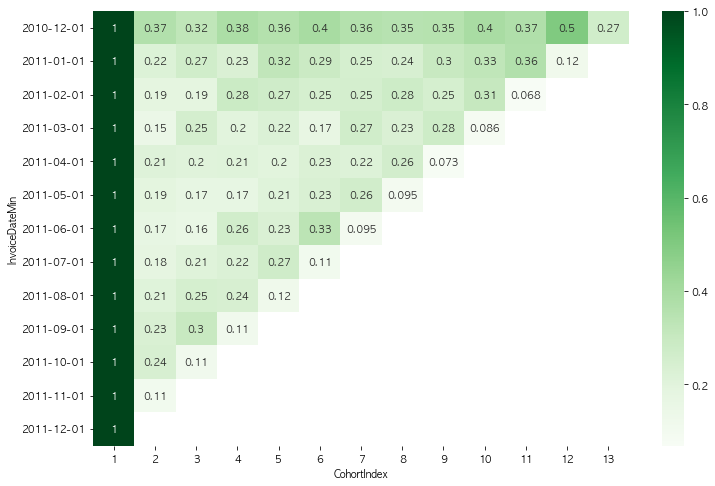

In [105]:
# heatmap을 통해 위에서 구한 잔존률을 시각화 합니다.
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_ratio, annot=True, cmap="Greens")